# Cleaning up the NBA Data

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
# stat columns used in the weekly matchups in a NBA fantasy league
stats = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [290]:
# read per game data of NBA players from 1947 to present
df = pd.read_csv('../stats-csv/nba-per-game-stats.csv', header = 0)

In [291]:
# renaming columns
df.rename(columns={'mp_per_game': 'MP',
                   'fg_per_game': 'FGM',
                   'fga_per_game': 'FGA',
                   'x3p_per_game': 'FG3M',
                   'x3pa_per_game': 'FG3A',
                   'ft_per_game': 'FTM',
                   'fta_per_game': 'FTA',
                   'orb_per_game': 'OREB',
                   'drb_per_game': 'DREB',
                   'ast_per_game': 'AST',
                   'stl_per_game': 'STL',
                   'blk_per_game': 'BLK',
                   'tov_per_game': 'TOV',
                   'pf_per_game': 'PF',
                   'pts_per_game': 'PTS'}, inplace=True)

# remove unnecessary columns
df = df.drop(['seas_id','trb_per_game', 'x2pa_per_game', 'x2p_per_game'], axis=1)

In [292]:
# drop rows where all values are NaN
cleaned_df = df.dropna(axis=0, how='all')

<AxesSubplot:>

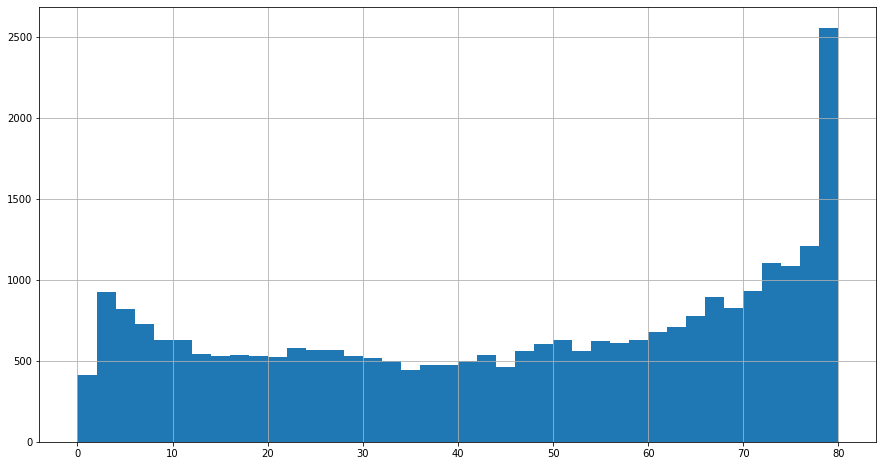

In [293]:
# removing outliers in the data
# histogram of games played in the dataframe
bin_vals = np.arange(start = 0, stop=82, step=2)
cleaned_df['g'].hist(bins=bin_vals, figsize=[15, 8])

In [294]:
# by observing the histogram, we can see the data set gets more normal after 10 games
# so all seasons for players that played in less than 10 games will be removed from the dataframe
min_games = 10
filtered_df = cleaned_df[cleaned_df['g'] > min_games]

In [295]:
a = cleaned_df['player_id'].count()
b = filtered_df['player_id'].count()

In [296]:
a - b
# 3827 rows have been removed

3827

# Normalising Data Across NBA Seasons
A 20 points per game player in 1995 is not equivalent to a 20 points per game player in 2023. The playstyle, pace and rules of the NBA have drastically changed over the years. More specifically, the pace of the game has increased, with the average points per game of each season increasing consistently alongside the league's evolution. A key contributor to this is the increased volume in three point shooting, which allows a modern NBA player to more easily average 20 points per game compared to a NBA player from the past. Normalising the stats across NBA seasons will allow for better comparison between players' seasons across multiple decades.

In [297]:
latest_season = (filtered_df['season'] == 2023)

In [298]:
df_2023 = filtered_df[latest_season]

In [299]:
# function to normalise each stat column
def normalise(column):
    return (column - column.min()) / (column.max() - column.min())

In [300]:
stats_to_norm = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [301]:
# function to normalise the dataframe using the function above
def normalise_df(df):
    for stat in stats_to_norm:
        df['NORM_{}'.format(stat)] = normalise(df[stat])
    return df

In [302]:
normed_2023 = normalise_df(df_2023)

/home/nathhuynh/nba-fantasy/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [303]:
normed_2023.sample(5)

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
119,2023,4924,David Duke Jr.,NaN,SG,23.0,2,NBA,BRK,23,...,0.043860,0.05,0.056911,0.098039,0.063830,0.075472,0.166667,0.175,0.000000,0.324324
295,2023,3761,Jeff Green,NaN,PF,36.0,15,NBA,DEN,56,...,0.166667,0.16,0.170732,0.137255,0.180851,0.103774,0.111111,0.175,0.100000,0.459459
359,2023,4339,Karl-Anthony Towns,NaN,PF,27.0,8,NBA,MIN,29,...,0.500000,0.41,0.382114,0.333333,0.670213,0.443396,0.333333,0.725,0.200000,1.000000
506,2023,4352,Nikola Jokić,NaN,C,27.0,8,NBA,DEN,69,...,0.192982,0.49,0.487805,0.470588,0.978723,0.915094,0.666667,0.875,0.233333,0.648649
364,2023,4177,Kelly Olynyk,NaN,C,31.0,10,NBA,UTA,68,...,0.307018,0.29,0.276423,0.235294,0.510638,0.339623,0.444444,0.600,0.166667,0.891892


Now we have the columns of normalised stats to compare players across a season. However, since the dataframe is comprised of multiple seasons, we will have to groupby season. 

In [304]:
new_df = filtered_df.groupby(['season']).apply(normalise_df)

In [305]:
new_df.sample(5)

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
27956,1968,694,Rudy LaRusso,NaN,PF,30.0,9,NBA,SFW,79,...,NaN,0.741573,0.732143,NaN,NaN,0.237113,NaN,NaN,NaN,0.952381
12348,2004,3093,Tim Thomas,NaN,SF,26.0,7,NBA,MIL,42,...,0.356322,0.305556,0.287129,0.195652,0.361111,0.225806,0.416667,0.372093,0.090909,0.743590
22314,1982,1953,Mike O'Koren,NaN,SF,23.0,2,NBA,NJN,80,...,0.096774,0.202532,0.212121,0.191176,0.234694,0.242105,0.346154,0.414634,0.064516,0.409091
773,2022,3435,Carmelo Anthony,NaN,PF,37.0,19,NBA,LAL,69,...,0.495726,0.197917,0.194915,0.195652,0.287037,0.092593,0.318182,0.187500,0.285714,0.621622
26215,1972,1384,Larry Steele,NaN,SG,22.0,1,NBA,POR,72,...,NaN,0.102273,0.112150,NaN,NaN,0.218750,NaN,NaN,NaN,0.615385


Now we have normalised the data across each stat column across every player in every season.

# Function to calculate the distance between two players
The player distance function calculates how close two players are on any given stat.

In [306]:
# function uses the euclidean distance formula, finding the shortest path between the two points
def calc_distance(a, b):
    dist = np.sqrt(np.sum(a - b)**2)
    return dist

In [307]:
# testing this function with three players from the dataframe
tatum_df = df_2023[df_2023['player'] == 'Jayson Tatum']
ayton_df = df_2023[df_2023['player'] == 'Deandre Ayton']
doncic_df = df_2023[df_2023['player'] == 'Luka Dončić']

In [308]:
tatum_ppg = tatum_df.PTS.tolist()[0]
ayton_ppg = ayton_df.PTS.tolist()[0]
doncic_ppg = doncic_df.PTS.tolist()[0]

In [309]:
# run the calc_distance function for each pairing
calc_distance(tatum_ppg, ayton_ppg)

12.100000000000001

In [310]:
calc_distance(tatum_ppg, doncic_ppg)

2.299999999999997

In [311]:
calc_distance(ayton_ppg, doncic_ppg)

14.399999999999999

Hence, the model will group Tatum closer to Doncic for ppg and further from Ayton for ppg.

# Function to Find A Player
Find a row of data based on a player's id and season.

In [312]:
def find_player(df, player_id, season):
    for row in df.itertuples():
        if player_id == row.player_id and season == row.season:
            return row

In [313]:
# testing with DeMar DeRozan's 2017 season
find_player(new_df, 3872, 2017)

Pandas(Index=4358, season=2017, player_id=3872, player='DeMar DeRozan', birth_year=nan, pos='SG', age=27.0, experience=8, lg='NBA', tm='TOR', g=74, gs=74.0, MP=35.4, FGM=9.7, FGA=20.9, fg_percent=0.467, FG3M=0.4, FG3A=1.7, x3p_percent=0.266, x2p_percent=0.484, e_fg_percent=0.47700000000000004, FTM=7.4, FTA=8.7, ft_percent=0.8420000000000001, OREB=0.9, DREB=4.3, AST=3.9, STL=1.1, BLK=0.2, TOV=2.4, PF=1.8, PTS=27.3, NORM_PTS=0.8603896103896104, NORM_MP=0.930835734870317, NORM_FGM=0.9405940594059404, NORM_FGA=0.8663793103448275, NORM_FG3M=0.09756097560975611, NORM_FG3A=0.16999999999999998, NORM_FTM=0.8043478260869567, NORM_FTA=0.7981651376146788, NORM_OREB=0.20930232558139536, NORM_DREB=0.40594059405940586, NORM_AST=0.34234234234234234, NORM_STL=0.55, NORM_TOV=0.41071428571428564, NORM_BLK=0.07692307692307693, NORM_PF=0.39534883720930225)

# Calculating Similarity of Players
Using the calc_distance function, a single player's normalised stats will be compared with every other player's normalised stats to find the 10 most similar player seasons. This process will then be repeated for each player.

In [314]:
# Firstly, completing this process with a single random player

In [315]:
# Grant Williams
current_player_id = 4720
current_season = 2023

In [316]:
# Calculate all of Grant William's normalised stats
# Using the normalised df that has been groupedby season
current_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PF']).item()
])

In [317]:
print(current_player_stats)

[0.23780488 0.65642458 0.23423423 0.25345622 0.30612245 0.3245614
 0.12       0.12195122 0.21568627 0.35106383 0.1509434  0.22222222
 0.225      0.13333333 0.62162162]


In [318]:
# Now comparing with another player, Russell Westbrook 2016
westbrook_player_id = 3849
westbrook_mvp_season = 2016

In [319]:
westbrook_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PF']).item()
])

In [320]:
# Using the calc_distance function to compare the two players for each normalised stat
# vectorize the function to operate on a set of values instead of a single value at a time
vectorized_func = np.vectorize(calc_distance)

In [321]:
distance_vector = vectorized_func(current_player_stats, westbrook_player_stats)

In [322]:
distance_vector

array([0.53922215, 0.236639  , 0.56576577, 0.62654378, 0.05122049,
       0.05936717, 0.53909091, 0.58393113, 0.15166066, 0.21893617,
       0.73794549, 0.73015873, 0.70978261, 0.05225225, 0.06409266])

In [323]:
# Now dividing the sum total of the absolute difference with the number of columns to find the average percent error
error = np.sum(np.abs(distance_vector) / len(distance_vector))

In [324]:
error

0.39110726515536737

This indicates that Williams' and Westbrook's seasons weren't statistically similar. Which makes sense considering the large difference in each players' skillsets, roles within their team and statistical averages.

# Using a For Loop to Compare Multiple Players
Using the logic in the section above, we will compare Grant Williams' 2023 season with a random sample of 5 players' seasons in the dataframe.

In [327]:
distance_list = []
sample_df = new_df.sample(5)

In [328]:
# for each row, create a vector for all normalised stats for the target player, the player being compared to Grant Williams
for row in sample_df.itertuples():
    target_player_stats = np.array([
        row.NORM_PTS,
        row.NORM_MP,
        row.NORM_FGM,
        row.NORM_FGA,
        row.NORM_FG3M,
        row.NORM_FG3A,
        row.NORM_FTM,
        row.NORM_FTA,
        row.NORM_OREB,
        row.NORM_DREB,
        row.NORM_AST,
        row.NORM_STL,
        row.NORM_TOV,
        row.NORM_BLK,
        row.NORM_PF
    ])
    
    # vectorize the calc_distance function and run it to compare Grant Williams with the target player
    vectorized_func = np.vectorize(calc_distance)
    distance_vector = vectorized_func(current_player_stats, target_player_stats)
    # calculate the error and append it to the distance list
    error = np.sum(np.abs(distance_vector) / len(distance_vector))
    distance_list.append(error)
    compared_player = row.player
    print('Compared to ' + compared_player + '. Error: ' + str(error))

Compared to Torrey Craig. Error: 0.11751395440744627
Compared to Travis Best. Error: 0.12918161725703525
Compared to Glenn Robinson. Error: 0.16757195801185795
Compared to Anthony Davis. Error: 0.36526013415700803
Compared to Wayne Cooper. Error: 0.10650725505092637


In [329]:
# adding distance as a new column in the sample_df
sample_df['distance'] = distance_list

In [330]:
# sort the dataframe by shortest distance to furthest
sorted_df = sample_df.sort_values('distance')
sorted_df

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF,distance
22779,1981,1842,Wayne Cooper,NaN,C,24.0,3,NBA,UTA,71,...,0.111111,0.128713,0.389831,0.436782,0.066667,0.088235,0.243243,0.205882,0.717949,0.106507
4159,2018,4570,Torrey Craig,NaN,SF,27.0,1,NBA,DEN,39,...,0.068966,0.089109,0.196078,0.186916,0.058252,0.125000,0.100000,0.153846,0.421053,0.117514
16025,1997,2962,Travis Best,NaN,PG,24.0,2,NBA,IND,76,...,0.312500,0.276596,0.084746,0.150000,0.341463,0.481481,0.454545,0.025000,0.692308,0.129182
12025,2004,2862,Glenn Robinson,NaN,SF,31.0,10,NBA,PHI,42,...,0.375000,0.326733,0.239130,0.305556,0.150538,0.416667,0.558140,0.045455,0.564103,0.167572
6083,2014,4066,Anthony Davis,NaN,PF,20.0,2,NBA,NOP,67,...,0.597701,0.666667,0.574074,0.723404,0.149533,0.520000,0.405405,1.000000,0.777778,0.365260


The shorter the distance, the more similar any two players' seasons are. Therefore, Wayne Coopers's 1981 season is the most similar season compared to Grant Williams' 2023 season in the small sample.

# Logic for the next steps of the model...
For each current player partaking in the 2023-24 season, we will be finding the 10 most similar player seasons across history. Once we have the 10 most similar seasons, we will look at the following season (the season after) for each of them. The logic is that we can use a weighted average of the following season stats for those 10 seasons to predict the current player's upcoming stats.

A weighted average will be used to allow for similar seasons with the lowest error (shortest distance) to be more emphasised.

In [331]:
seasons = [str(year) for year in range(1947, 2024)]
predicted_stats = {}

In [ ]:
# loop to get the sum of stats and weight from the 5 ranked seasons above
for col in stats:
    stat_sum = 0
    weight_sum = 0
    for index, row in sorted_df.iloc[0:5].iterrows():
        # can't take the following season, skip it
        if row.season == '2023':
            continue
        weight = (1 / row.distance)
        following_season = row.season + 1
        # use the find player function to find the stats for the following season
        following_season_stats = find_player(sorted_df, row.player_id, following_season)
        if following_season_stats == None:
            continue
        stat_sum += getattr(following_season_stats, col) * weight
        weight_sum += weight
    # insert into the predicted stats dataframe
    predicted_stats['player_id'] = current_player_id
    predicted_stats['predicted_season'] = following_season
    # ie. predicted points per game is the sum of all 5 players' points per game divided by weight
    predicted_stats['predicted_' + col] = (stat_sum / weight_sum)

# Bringing it all together...
Predicting the stats for all players coming into the 2023-24 season.

In [333]:
def stats_prediction(df, current_season, current_player_id):
    current_season = int(current_season)
    current_player_id = int(current_player_id)
    if not ((df['season'] == current_season) & (df['player_id'] == current_player_id)).any():
        print('Cannot find player in season {} with player_id {}'.format(current_season, current_player_id))
        return
    for row in df.itertuples():
        if current_season == row.season and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    # calculate all of current player's normalised stats, using the normalised dataframe that has been grouped by season
    current_player_stats = np.array([
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PTS']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_MP']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGM']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGA']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3M']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3A']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTM']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTA']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_OREB']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_DREB']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_AST']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_STL']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_TOV']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_BLK']).item(),
        (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PF']).item()
    ])

    distance_list = []
    
    # these values can be adjusted to suit the point system being used in the Fantasy League you are playing in
    # default settings are a weight of 1.0 for each stat
    fantasy_points_weighting = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    # for each row, create a vector for all normalised stats for the target player
    for row in sample_df.itertuples():
        target_player_stats = np.array([
            row.NORM_PTS,
            row.NORM_MP,
            row.NORM_FGM,
            row.NORM_FGA,
            row.NORM_FG3M,
            row.NORM_FG3A,
            row.NORM_FTM,
            row.NORM_FTA,
            row.NORM_OREB,
            row.NORM_DREB,
            row.NORM_AST,
            row.NORM_STL,
            row.NORM_TOV,
            row.NORM_BLK,
            row.NORM_PF
        ])

        # vectorize the calc_distance function and run it to compare Grant Williams with the target player
        vectorized_func = np.vectorize(calc_distance)
        distance_vector = vectorized_func(current_player_stats, target_player_stats)
        # apply the weighting settings
        weighted_dist = distance_vector * fantasy_points_weighting
        np.sum(np.abs(weighted_dist)) / len(distance_vector)
        # calculate the error and append it to the distance list
        distance_list.append(error)
    
    df['distance'] = distance_list
    
    # dataframe sorted by shortest distance
    sorted_df = df.sort_values('distance')
    
    predicted_stats = {}
    print('Predicting {} stats for player id: '.format(current_season+1,  current_player_id))
    
    # loop to get the sum of stats and weight from the 5 ranked seasons above
    for col in stats:
        stat_sum = 0
        weight_sum = 0
        for index, row in sorted_df.iloc[0:5].iterrows():
            # can't take the following season, skip it
            if row.season == '2023':
                continue
            weight = (1 / row.distance)
            following_season = row.season + 1
            # use the find player function to find the stats for the following season
            following_season_stats = find_player(sorted_df, row.player_id, following_season)
            if following_season_stats == None:
                continue
            stat_sum += getattr(following_season_stats, col) * weight
            weight_sum += weight
        # insert into the predicted stats dataframe
        predicted_stats['player_id'] = current_player_id
        predicted_stats['predicted_season'] = following_season
        # ie. predicted points per game is the sum of all 5 players' points per game divided by weight
        predicted_stats['predicted_' + col] = (stat_sum / weight_sum)
    
    return predicted_stats

# Predicting 2023-24 NBA Season Stats
A quick test run with 5 randomly selected players...

In [335]:
df_2023.sample(5)

,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
654,2023,4895,Vernon Carey Jr.,NaN,C,21.0,3,NBA,WAS,11,...,0.000000,0.02,0.016260,0.058824,0.053191,0.018868,0.055556,0.025,0.066667,0.108108
107,2023,3867,Danny Green,NaN,SG,35.0,14,NBA,TOT,11,...,0.298246,0.01,0.008130,0.058824,0.085106,0.037736,0.222222,0.200,0.100000,0.378378
177,2023,3815,Eric Gordon,NaN,SG,34.0,15,NBA,LAC,22,...,0.438596,0.15,0.138211,0.039216,0.138298,0.188679,0.277778,0.225,0.133333,0.378378
94,2023,4317,D'Angelo Russell,NaN,PG,26.0,8,NBA,TOT,71,...,0.605263,0.25,0.243902,0.098039,0.244681,0.575472,0.500000,0.625,0.133333,0.513514
251,2023,4630,Jalen Brunson,NaN,PG,26.0,5,NBA,NYK,68,...,0.412281,0.48,0.471545,0.117647,0.297872,0.575472,0.444444,0.500,0.066667,0.567568


In [336]:
players = new_df[new_df['season'] == 2023]

In [337]:
player_ids_2023 = players['player_id'].tolist()

In [ ]:
for player in players:
    current_season = '2023'
    current_player_id = player
    # generate stats predictions for each player
    predictions = stats_prediction(new_df, current_season, current_player_id)
    if (predictions == None):
        continue
    predictions_data.append(predictions)